# Project: Write a data science blog post

## Table of Contents

1. Bussiness understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation

## 1. Business understanding

Dissolved oxygen in water is important and finding parameters influencing the dissolved oxygen (DO) concentration can establish a healthy aquatic community. Paramters may influence DO include salinity, water temperature, total nitrogen, total phosphorus, and chlorophyll-a. In this study, data including DO, salinity, water temperature, total nitrogen, total phosphorus, and chlorophyll-a from WBID 2189A were collected and the parameters affect dissolved oxygen were investigated through multiple linear regression model using Phython. With the dataset and modeling we weill try to understand the following: 

a. What parameters have great effects on DO in this waterbody?
b. How do those parameters influence DO?
c. Do the model results make sense?
d. How to improve model performance to better interpret the relationship between DO and other parameters?


## 2. Data understanding

In this section, we will read data into python, understand the columns and rows of the dataframe and clean the dataframe for the modeling process. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Access

In [5]:
# read raw data into python

df = pd.read_excel('C:/Users/lilia/Desktop/Udacity/Project_1/Data.xlsx')
df.head()

,wbid,BODY,rawData_periodOfRecordQuery.class,NAME1,BASIN,sta,LAT,LONG,Year,Month,...,xCode,dUnits2,agency,labName,masterCode2,floridaStandards_forMatching.class,thisCriteria,floridaStandards_forMatching.Units,standardWithUnits,criterionText
0,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,COND,3F,1275.0,uohm/cm,1275 or >50% Nat. Background,Criterion from the Florida Standards for this ...
2,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,B,m,21FLA,Columbia Analytical Services,FCOLI,3F,400.0,100ml,=400 MPN,Criterion from the Florida Standards for this ...


In [9]:
df.shape

(1094, 51)

In [6]:
# Check what columns are there in the dataframe
print(df.columns)

Index(['wbid', 'BODY', 'rawData_periodOfRecordQuery.class', 'NAME1', 'BASIN',
       'sta', 'LAT', 'LONG', 'Year', 'Month', 'Day', 'Time', 'ID', 'depth',
       'param', 'result', 'rawData_periodOfRecordQuery.Units', 'rcode', 'lab',
       'GROUP_NAME', 'GROUP_NUM', 'PLANUNIT', 'description', 'epa', 'week2',
       'season', 'ds', 'Master parameter Code', 'subcategory',
       'Master parameter', 'cycle', 'begin_pp', 'end_pp', 'begin_vp', 'end_vp',
       'mdl', 'pql', 'staName', 'planPeriod', 'verPeriod', 'assessmentType',
       'xCode', 'dUnits2', 'agency', 'labName', 'masterCode2',
       'floridaStandards_forMatching.class', 'thisCriteria',
       'floridaStandards_forMatching.Units', 'standardWithUnits',
       'criterionText'],
      dtype='object')


In [7]:
df.describe()

,LAT,LONG,Year,Month,Day,Time,depth,param,result,lab,week2,season,cycle,mdl,pql,thisCriteria
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,398.000000,1094.000000,1094.000000,1094.0,354.000000,328.000000,243.000000
mean,30.460613,-81.566860,2012.231261,5.392139,19.544790,1043.392139,0.131563,13444.493601,187.205848,3.208543,4806.999086,2.112431,4.0,12.773509,12.496697,634.423621
std,0.002272,0.000558,3.610812,3.715004,6.429525,104.455889,0.068515,26086.143099,978.674927,3.257888,332.254861,1.225369,0.0,58.660962,59.468522,572.194421
min,30.457572,-81.568428,2007.000000,1.000000,4.000000,850.000000,0.020000,10.000000,0.000100,1.000000,4295.000000,1.000000,4.0,0.000100,0.000380,-20.000000
25%,30.458707,-81.567160,2008.000000,2.000000,17.000000,955.000000,0.090000,299.000000,0.200000,1.000000,4398.000000,1.000000,4.0,0.050000,0.100000,39.500000
50%,30.458707,-81.567160,2013.000000,4.000000,20.000000,1035.000000,0.100000,445.000000,6.600000,2.000000,4915.000000,2.000000,4.0,0.300000,1.000000,400.000000
75%,30.463108,-81.566378,2015.000000,9.000000,24.000000,1101.000000,0.200000,1111.500000,47.000000,2.000000,5044.000000,3.000000,4.0,9.000000,8.250000,1275.000000
max,30.463108,-81.566378,2019.000000,12.000000,31.000000,1355.000000,0.350000,82903.000000,24000.000000,10.000000,5400.000000,4.000000,4.0,1000.000000,1000.000000,4300.000000


## 3. Data preparation

### Clean

In [10]:
# Create a dataframe with selected columns

dfs = df[df.columns[df.columns.isin(['ID','Year','Month','Day','result','Master parameter'])]]

In [11]:
# Create dissolved oxygen (DO), chlorophyll-a (CHLAC), total phosphorus (TP), total nitrogen (TN), 
# temperature (TEMP), and salinity (SALIN) dataframes

dfs_DO = dfs.loc[df['Master parameter Code']== 'DO']

In [12]:
dfs_CHLAC = dfs.loc[df['Master parameter Code']== 'CHLAC']

In [13]:
dfs_TP = dfs.loc[df['Master parameter Code']== 'TP']

In [14]:
dfs_TN = dfs.loc[df['Master parameter Code']== 'TN']

In [15]:
dfs_TEMP = dfs.loc[df['Master parameter Code']== 'TEMP']

In [16]:
dfs_SALIN = dfs.loc[df['Master parameter Code']== 'SALIN']

In [17]:
# Join above dataframes together on column "ID" and create a new final dataframe: df_final

dfs_DO_CHLAC = pd.merge(dfs_DO, dfs_CHLAC, on=['ID','Year','Month','Day'], how='outer', suffixes=('_DO','_CHLAC'))

In [18]:
dfs_DO_CHLAC_TP = pd.merge(dfs_DO_CHLAC, dfs_TP, on = ['ID','Year','Month','Day'], how = 'outer')

In [19]:
dfs_DO_CHLAC_TP_TN = pd.merge(dfs_DO_CHLAC_TP, dfs_TN, on = ['ID','Year','Month','Day'], how = 'outer', suffixes=('_TP','_TN'))

In [20]:
dfs_DO_CHLAC_TP_TN_TEMP = pd.merge(dfs_DO_CHLAC_TP_TN, dfs_TEMP, on = ['ID','Year','Month','Day'], how = 'outer')

In [21]:
df_final = pd.merge(dfs_DO_CHLAC_TP_TN_TEMP, dfs_SALIN, on = ['ID','Year','Month','Day'], how = 'outer', suffixes=('_TEMP','_SALIN'))

In [22]:
df_final.to_excel("Final_050620.xlsx")

In [23]:
# Clean final dataframe: replace NA with mean value for the numeric columns

df = df_final.dropna(subset=['result_DO'], axis=0)
y=df['result_DO']

In [24]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

C:\Users\lilia\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## 4. Modeling

### Analyze

In [25]:
# Build a multiple linear regression model

X = df[['result_CHLAC', 'result_TP', 'result_TN', 'result_TEMP', 'result_SALIN']]
y = df['result_DO']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
# Check regression results and make scatter plots of predicted VS actual dissolved oxygen data  

y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 

In [28]:
r2_score(y_train, y_train_preds)

0.4122900394581742

In [29]:
r2_score(y_test, y_test_preds)

-0.4969958704099007

### Visualize

Text(9, 10, 'R2 = 0.41')

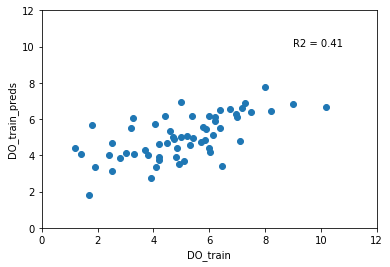

In [30]:
plt.scatter(y_train, y_train_preds) 
plt.xlabel('DO_train')
plt.ylabel('DO_train_preds')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.text(9,10, 'R2 = 0.41')

Text(9, 10, 'R2 = -0.5')

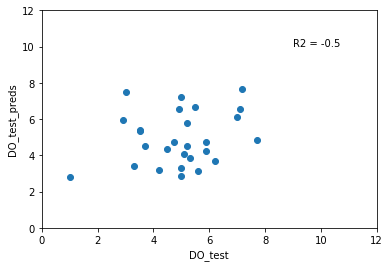

In [31]:
plt.scatter(y_test, y_test_preds) 
plt.xlabel('DO_test')
plt.ylabel('DO_test_preds')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.text(9,10, 'R2 = -0.5')

## 5. Evaluation

In [33]:
# Check regression model coefficient of each parameter

def coef_weights(coefficents, X_train):
    '''
    INPUT: 
    coefficients - the coefficients of the linear model
    X_train - the training data, so the column names can be used
    OUTPUT: 
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficient
    in a linear model by providing the coefficient estimates along with the name of variable
    attached to the coefficient. 
    '''

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coefs_df = coef_weights(lm_model.coef_, X_train)


In [34]:
coefs_df

,est_int,coefs,abs_coefs
4,result_SALIN,-14.821609,14.821609
1,result_TP,1.818215,1.818215
2,result_TN,1.527818,1.527818
3,result_TEMP,-0.283243,0.283243
0,result_CHLAC,0.194599,0.194599


### What parameters have great effects on DO in this waterbody?
Coefficient table has shown among the 5 independent parameters, salinity, TP and TN have great effects on DO.


### How do there parameters influence DO?
Model results suggest DO concentration decreases with the increase of salinity in the water. Model results also suggest DO concentration increases with the increase of TP and TN in the water. 


### Do the model results make sense?
Effect of salinity on DO makes sense, while effect of TN and TP contradict with other reports as discussed in the Medium blog.


### How to improve model performance to better interpret the relationship between DO and other parameters?
Two suggestions:
Add more data to build the multiple linear regression model. Authorities need to keep monitoring this waterbody and collect more data to be added to the model.
Other non-linear model can be considered, such as regression tree and random forest models.